In [45]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [8]:
# Obter as cotações
dados_bancario = yf.download(
    ["ITUB4.SA", "BBAS3.SA", "SANB4.SA", "BBDC4.SA", "^BVSP"], 
    start = "2010-01-01", 
    end = "2022-04-30"
)["Adj Close"]

[*********************100%***********************]  5 of 5 completed


In [9]:
dados_bancario

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2010-01-04,12.641327,7.674425,10.770150,5.563494,70045.0
2010-01-05,12.514488,7.636646,10.839947,5.563494,70240.0
2010-01-06,12.531404,7.575563,10.745987,5.563494,70729.0
2010-01-07,12.535631,7.555195,10.635927,5.563494,70451.0
2010-01-08,12.607506,7.547050,10.474855,5.563494,70263.0
...,...,...,...,...,...
2022-04-25,32.440689,17.946095,24.325464,16.824757,110685.0
2022-04-26,31.711473,17.175636,23.497814,16.059994,108213.0
2022-04-27,31.851702,17.278990,23.307545,16.069553,109349.0


In [10]:
# Carregar uma tabela do Excel
lucro_bancos = pd.read_excel("./lucro_bancos_2010_2022.xlsx", index_col = "data")

In [11]:
lucro_bancos

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,1068808,1805899
2021-12-31,21945688,19710402,24988000,14987716


In [12]:
# Filtrar os dados de uma determinada coluna ("ITUB4.SA")
dados_bancario["ITUB4.SA"]

Date
2010-01-04    10.770150
2010-01-05    10.839947
2010-01-06    10.745987
2010-01-07    10.635927
2010-01-08    10.474855
                ...    
2022-04-25    24.325464
2022-04-26    23.497814
2022-04-27    23.307545
2022-04-28    23.117281
2022-04-29    22.708208
Name: ITUB4.SA, Length: 3056, dtype: float64

In [16]:
# Filtrar os dados de mais de uma coluna ("ITUB4.SA" e "BBAS3.SA")
dados_bancario[["ITUB4.SA", "BBAS3.SA"]]

,ITUB4.SA,BBAS3.SA
Date,,
2010-01-04,10.770150,12.641327
2010-01-05,10.839947,12.514488
2010-01-06,10.745987,12.531404
2010-01-07,10.635927,12.535631
2010-01-08,10.474855,12.607506
...,...,...
2022-04-25,24.325464,32.440689
2022-04-26,23.497814,31.711473
2022-04-27,23.307545,31.851702


In [14]:
# Filtrar a partir de um determinado critério
dados_filtrados_2015 = dados_bancario[dados_bancario.index >= "2015-01-01"]

In [15]:
dados_filtrados_2015

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2015-01-02,13.836071,9.028625,12.872023,3.463754,48512.0
2015-01-05,13.548972,9.047248,12.936701,3.434890,47517.0
2015-01-06,13.738333,9.344872,13.145975,3.463754,48001.0
2015-01-07,14.343091,9.716242,13.621588,3.752400,49463.0
2015-01-08,14.391956,9.766285,13.834665,3.660033,49943.0
...,...,...,...,...,...
2022-04-25,32.440689,17.946095,24.325464,16.824757,110685.0
2022-04-26,31.711473,17.175636,23.497814,16.059994,108213.0
2022-04-27,31.851702,17.278990,23.307545,16.069553,109349.0


In [29]:
itau = dados_bancario["ITUB4.SA"]
santander = dados_bancario["SANB4.SA"]
banco_do_brasil = dados_bancario["BBAS3.SA"]
bradesco = dados_bancario["BBDC4.SA"]
dados_mercado = dados_bancario["^BVSP"]

In [34]:
def retorno(lista):
    return lista[-1] / lista[0] - 1

In [32]:
retorno_itau = retorno(itau)
retorno_santander = retorno(santander)
retorno_banco_do_brasil = retorno(banco_do_brasil)
retorno_bradesco = retorno(bradesco)
retorno_mercado = retorno(dados_mercado)

In [35]:
retorno_itau, retorno_santander, retorno_banco_do_brasil, retorno_bradesco, retorno_mercado

(1.1084393155919328,
 1.8574630385464985,
 1.45678709464043,
 1.2013058425905698,
 0.5400956527946321)

In [36]:
df_retornos = pd.DataFrame(
    data = {"retornos": [retorno_itau, retorno_santander, retorno_banco_do_brasil, retorno_bradesco, retorno_mercado]},
    index = ["Itau", "Santander", "Banco do Brasil", "Bradesco", "Ibovespa"]
)

In [38]:
df_retornos["retornos"] *= 100

In [39]:
df_retornos

,retornos
Itau,110.843932
Santander,185.746304
Banco do Brasil,145.678709
Bradesco,120.130584
Ibovespa,54.009565


In [40]:
df_retornos = df_retornos.sort_values(by = "retornos", ascending = False)

In [41]:
df_retornos

,retornos
Santander,185.746304
Banco do Brasil,145.678709
Bradesco,120.130584
Itau,110.843932
Ibovespa,54.009565


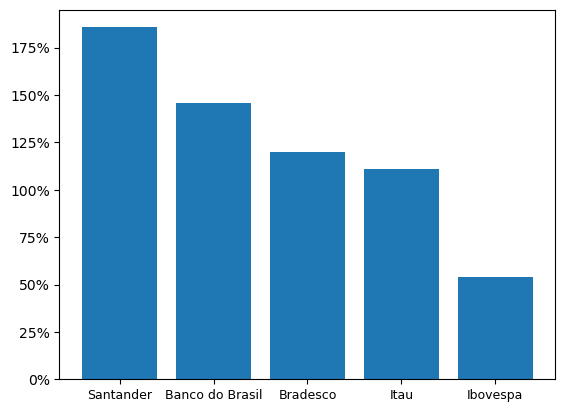

In [52]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index, df_retornos["retornos"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show() # Opcional para o Jupyter, pois ele mostra o gráfico automaticamento, porém em outros programas é necessário executar essa função

In [53]:
lucro_bancos

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,1068808,1805899
2021-12-31,21945688,19710402,24988000,14987716


In [60]:
variacao_lucro_bancos = lucro_bancos.iloc[-1] / lucro_bancos.iloc[0] - 1
variacao_lucro_bancos *= 100
variacao_lucro_bancos = variacao_lucro_bancos.sort_values(ascending = False)

In [62]:
variacao_lucro_bancos

itau               2237.931602
santander           729.931021
bradesco            173.900594
banco_do_brasil      94.238574
dtype: float64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Santander'),
  Text(1, 0, 'Banco do Brasil'),
  Text(2, 0, 'Bradesco'),
  Text(3, 0, 'Itau'),
  Text(4, 0, 'Ibovespa')])

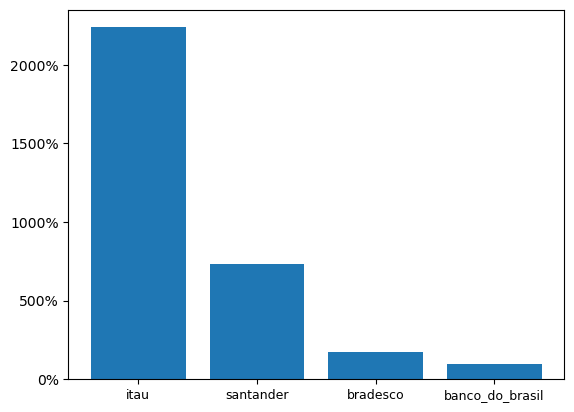

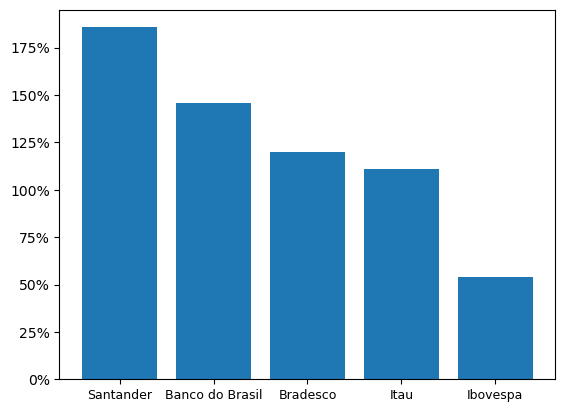

In [65]:
fig, ax = plt.subplots()

ax.bar(variacao_lucro_bancos.index, variacao_lucro_bancos)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

fig, ax = plt.subplots()

ax.bar(df_retornos.index, df_retornos["retornos"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

In [67]:
def resample_periodo(dado, periodo):
    dado_periodo_novo = dado.resample(str(periodo)).last()
    dado_periodo_novo = dado_periodo_novo.pct_change()
    dado_periodo_novo = dado_periodo_novo.dropna()
    
    return dado_periodo_novo

In [71]:
itau_ano_a_ano = resample_periodo(itau, "Y")
ibov_ano_a_ano = resample_periodo(dados_mercado, "Y")

In [76]:
outperform_itau = itau_ano_a_ano - ibov_ano_a_ano

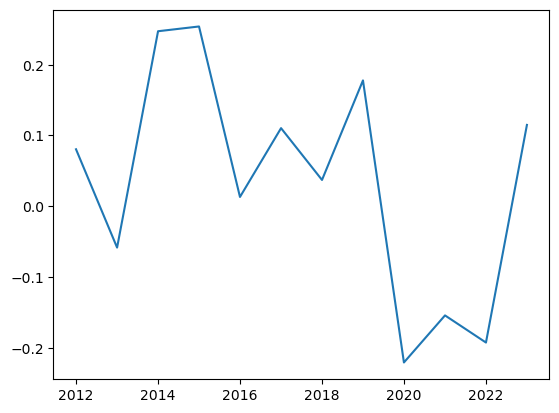

In [78]:
 plt.plot(outperform_itau)

In [80]:
meses_positivos = sum(outperform_itau > 0) / len(outperform_itau)

In [82]:
meses_positivos

0.6666666666666666

In [84]:
# long short é uma "aposta" que consiste na subida maior de um ativo em relação a outra (por exemplo: o Itau irá subir mais do que o IBOV)
def long_short(long, short, periodo):
    variacao_long = resample_periodo(long, periodo)
    variacao_short = resample_periodo(short, periodo)
    
    outperform = variacao_long - variacao_short
    plt.plot(outperform)

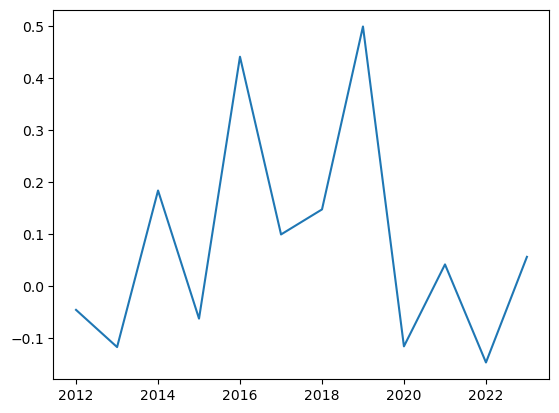

In [85]:
long_short(santander, dados_mercado, "Y")